In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv("flights.csv")
df.drop('Unnamed: 0',axis = 1, inplace = True)
df.drop('Age',axis = 1, inplace = True)
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)
df = df.dropna()
df.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1


In [3]:
feature = 'satisfaction'

X = df.drop(feature, axis=1)
y = df[feature]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02,random_state=42)

In [5]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8667953667953668

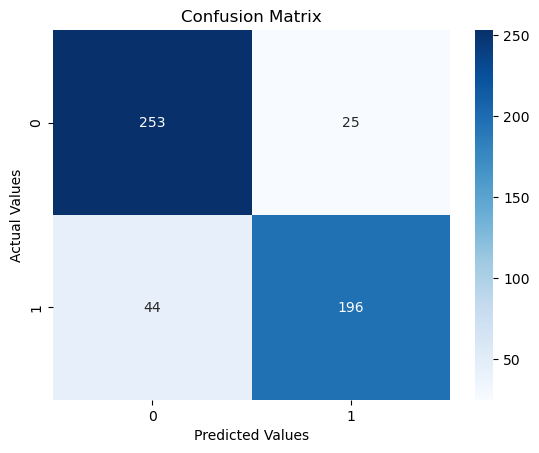

In [6]:
# Confusion matrix
confusion = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

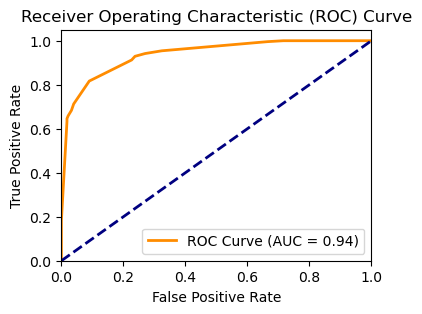

In [7]:
# Get predicted probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:,1]

# Calculate the ROC curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred_rf = clf_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9343629343629344


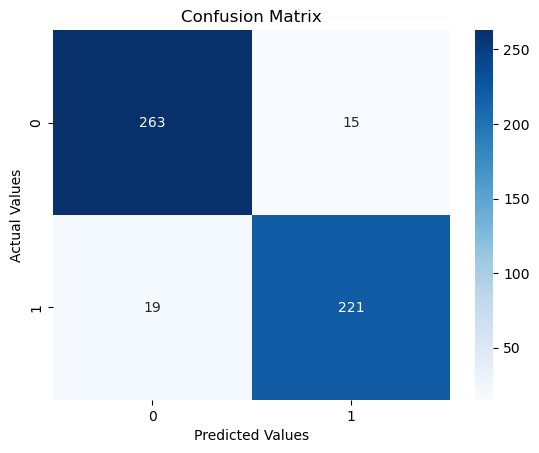

In [25]:
confusion = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

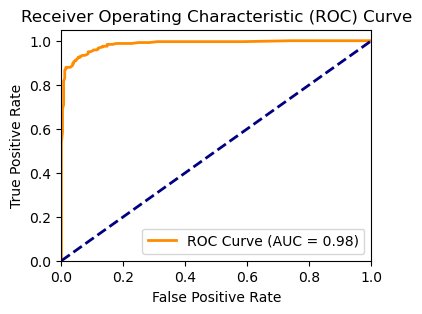

In [23]:
y_probs_rf = clf_rf.predict_proba(X_test)[:,1]

# Calculate the ROC curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)
auc = roc_auc_score(y_test, y_probs_rf)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [8]:
import xgboost as xgb

In [9]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False)
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [11]:
y_pred_xgb = clf_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)

XGBoost Accuracy: 0.9247104247104247


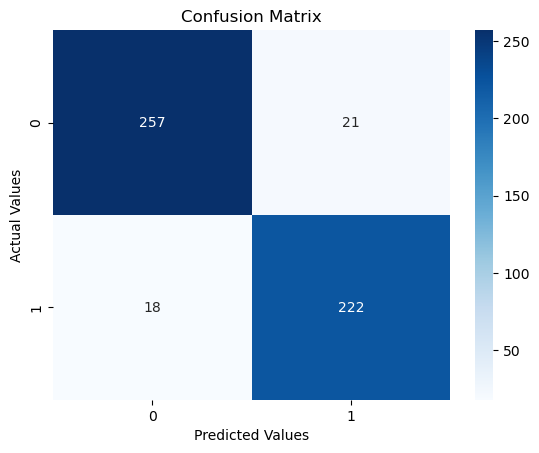

In [12]:
confusion = confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

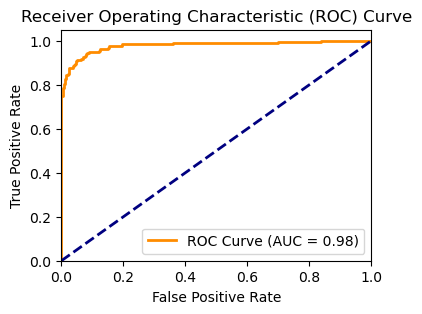

In [14]:
y_probs_xgb = clf_xgb.predict_proba(X_test)[:,1]

# Calculate the ROC curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb)
auc = roc_auc_score(y_test, y_probs_xgb)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()